In [1]:
print("TÔI YÊU CHỊ MI MEO!!!")

TÔI YÊU CHỊ MI MEO!!!


In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge , LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.shape

(545, 13)

In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
cat_col = [col for col in data.columns if data[col].dtype=='object']
num_col = [col for col in data.columns if data[col].dtype == 'int64']

In [18]:
num_col 

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

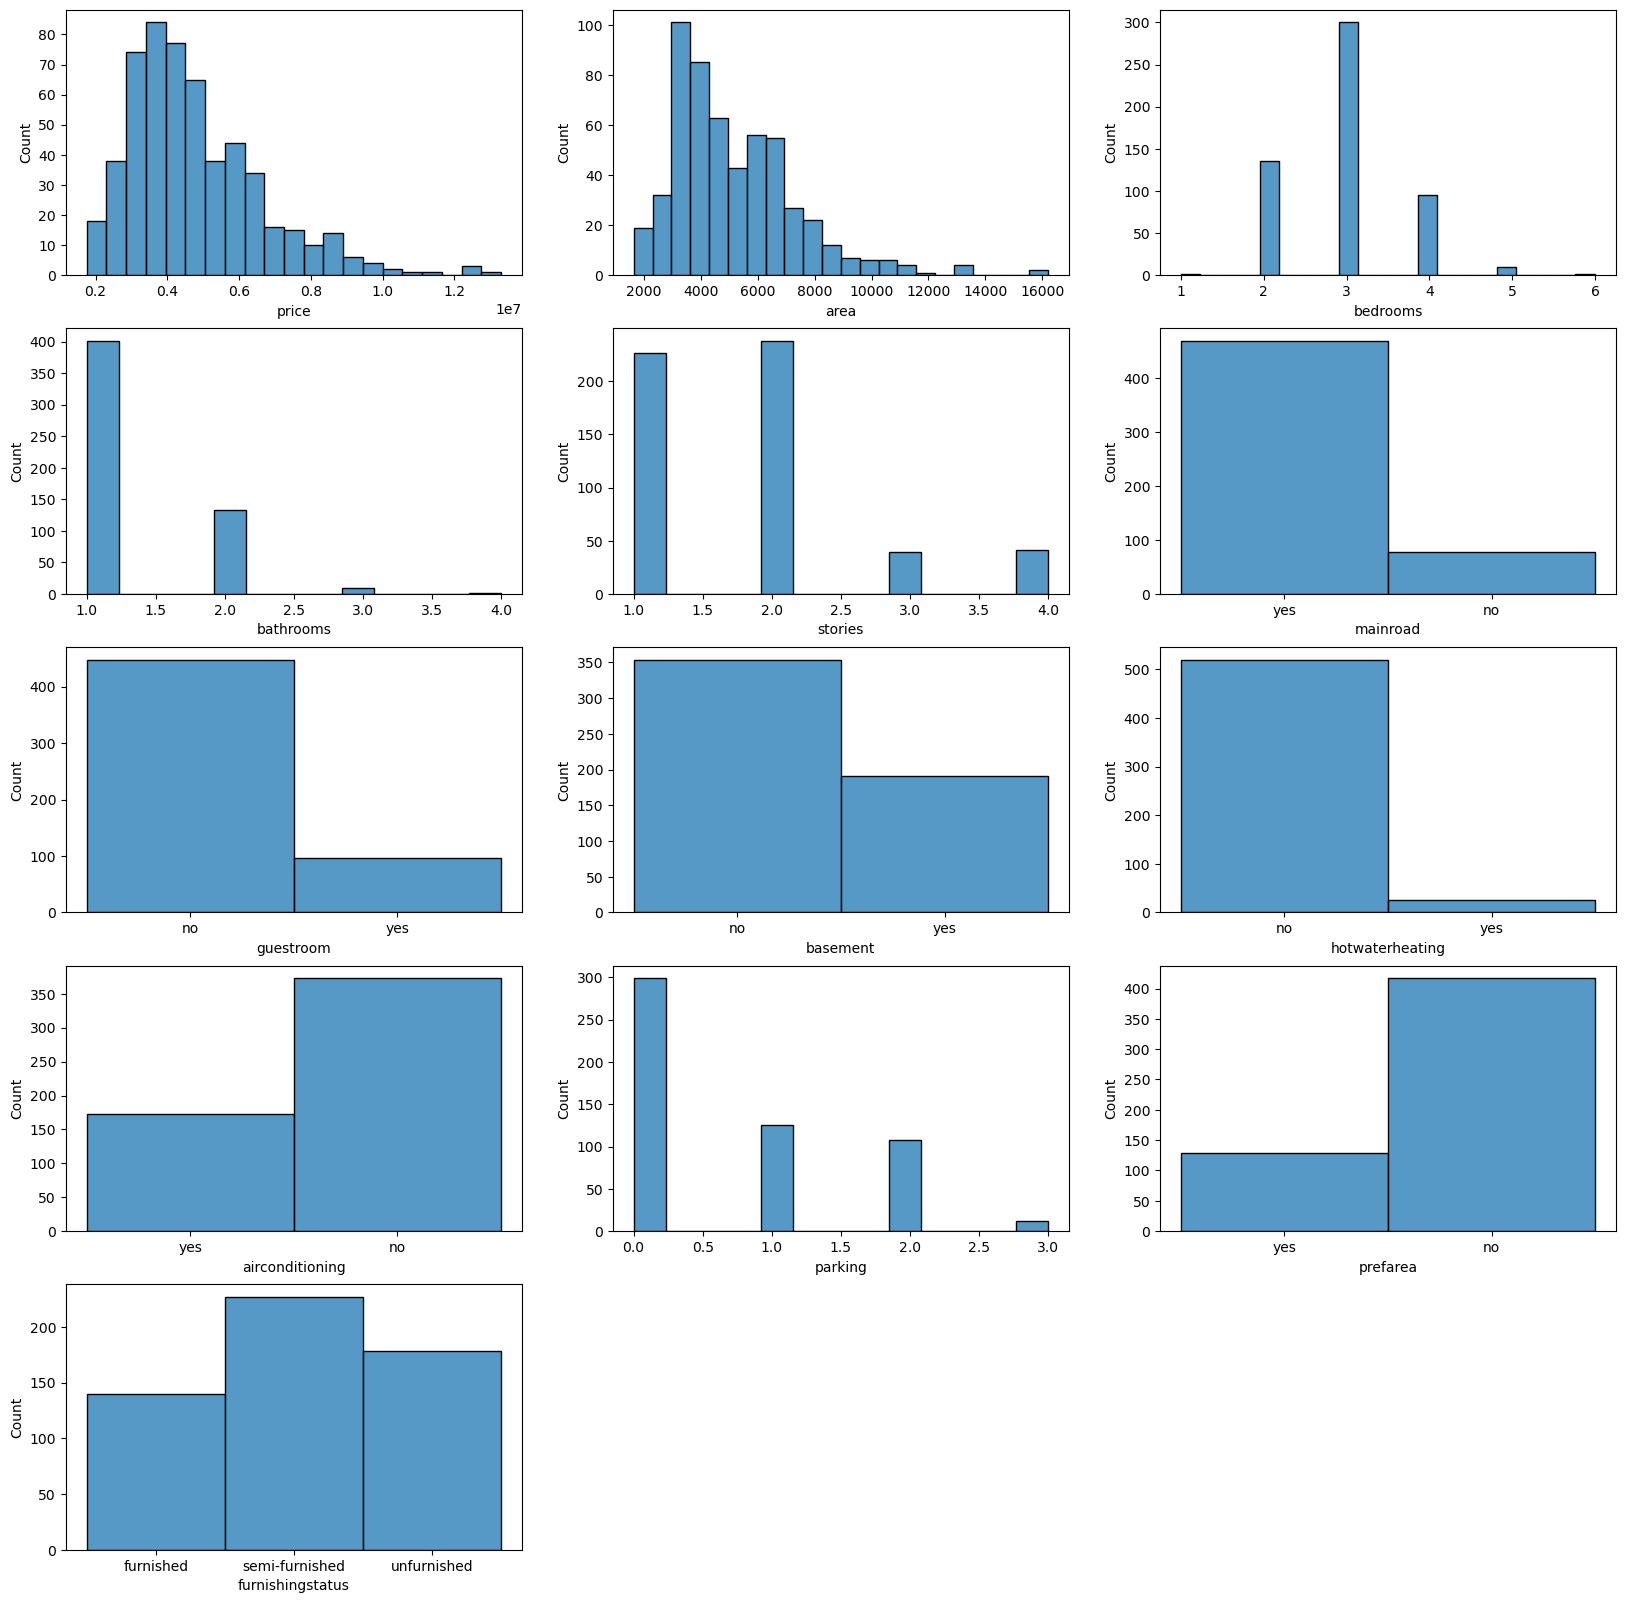

In [24]:
fig, axes = plt.subplots(5,3, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(data.columns, axes.flatten()):
    ax.set_axis_on()
    sns.histplot(data=data, x=col, ax=ax)

C:\Users\My computer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


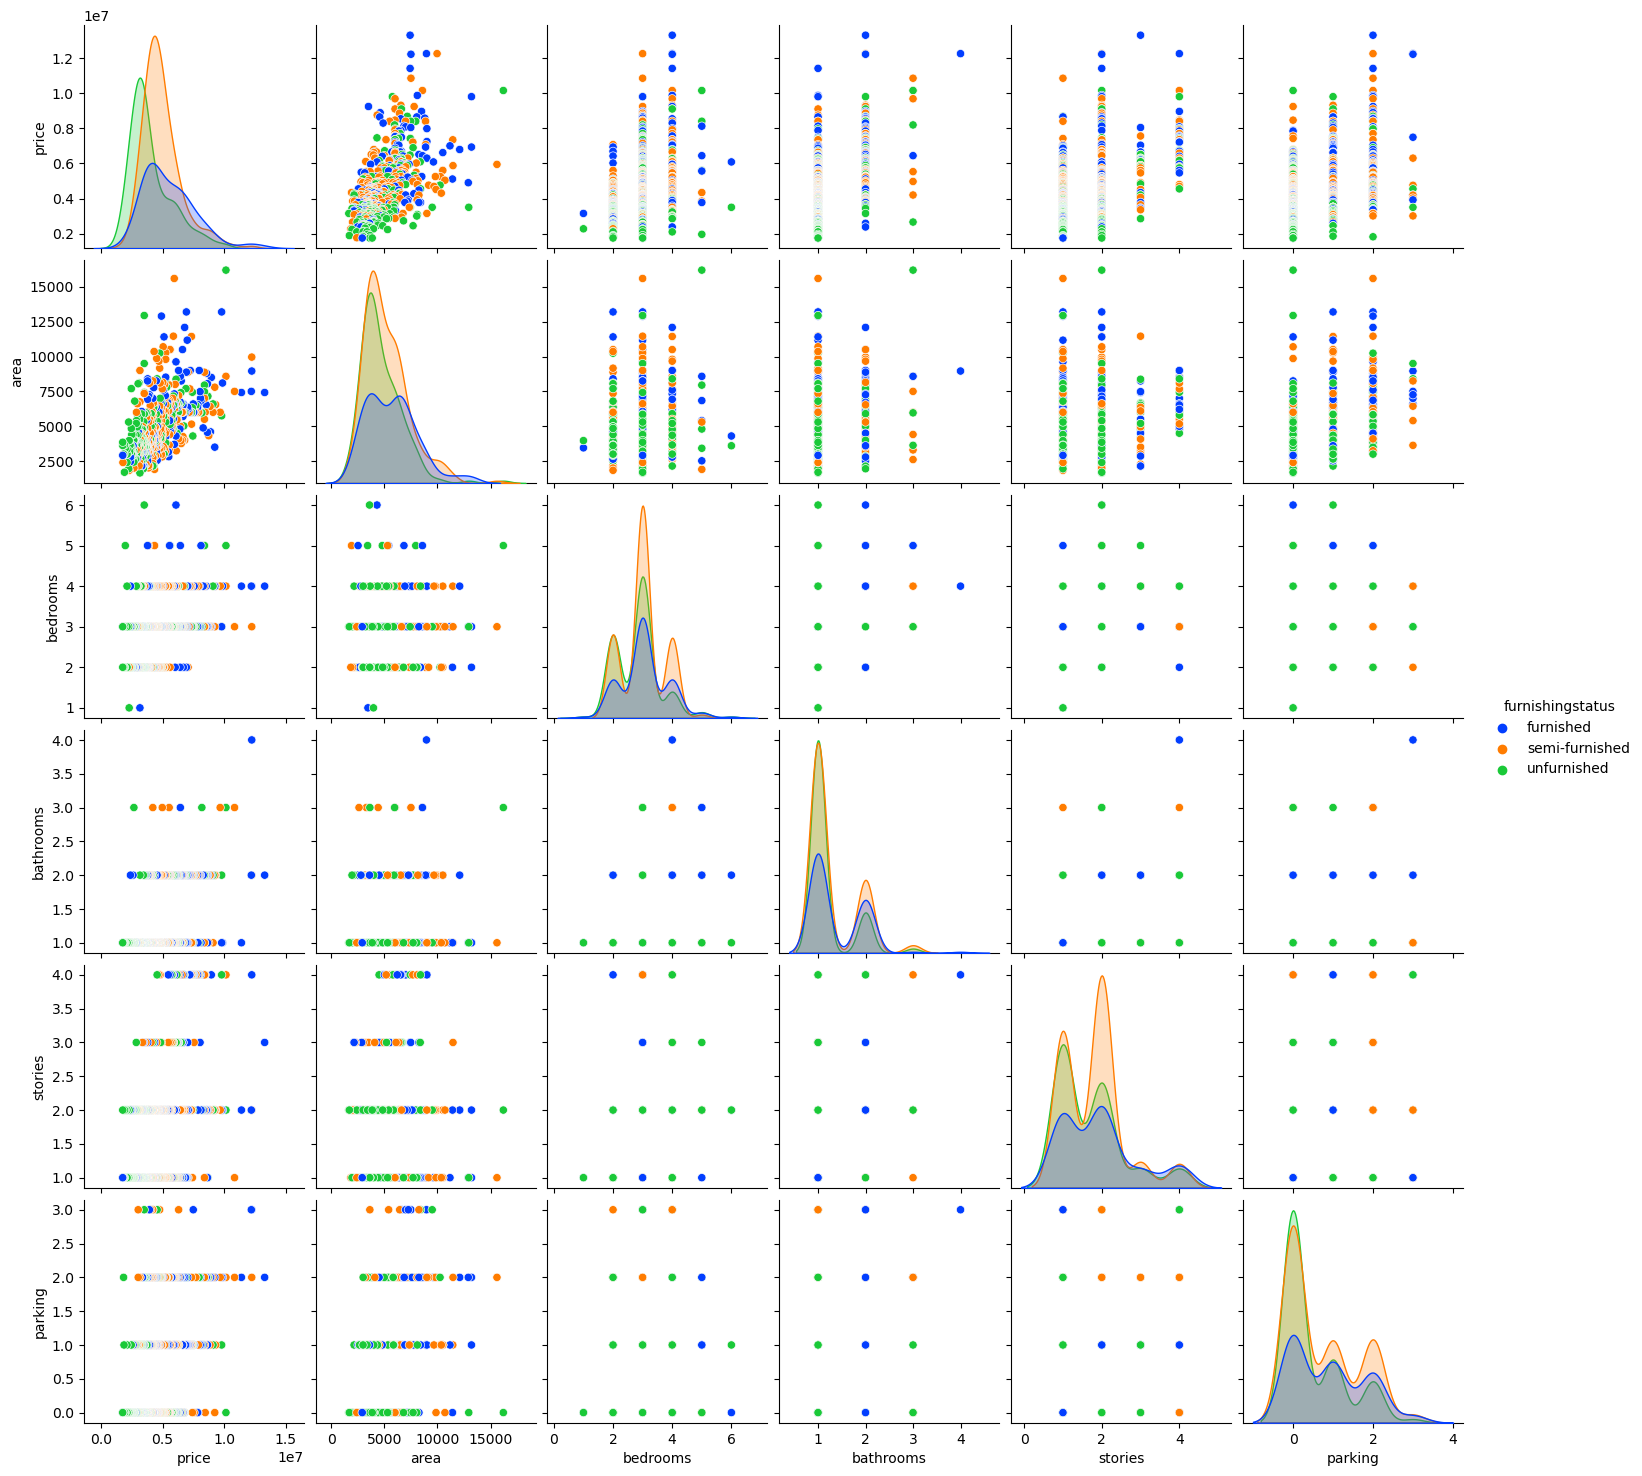

In [26]:
sns.pairplot(data=data , hue='furnishingstatus' , palette='bright');

In [29]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
data['mainroad'] = data['mainroad'].astype('category')

In [4]:
for col in cat_col : 
    data[col] = data[col].astype('category')

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
from sklearn.preprocessing import LabelEncoder 

In [26]:
label = LabelEncoder()

In [ ]:
for col in cat_col : 
    data[col] = label.fit_transform(data[col])

data.head()

In [28]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,
           fmt='.2f' , 
           vmin=-1 , vmax=1 , 
           linecolor='white' , linewidths=0.7);

ValueError: could not convert string to float: 'yes'

In [22]:
data = data.drop('furnishingstatus' , axis=1)
data = data.drop('hotwaterheating' , axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,no


In [23]:
X = data.drop('price' , axis=1)
y = data['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'yes'

In [27]:
model_1 = Lasso()
model_1.fit(X_train_scaled,y_train)
y_pre = model_1.predict(X_test_scaled)

In [28]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test,y_pre)

Mean Square Erroe : 1535048442199.4705
R2 Score : 0.6435418041153014


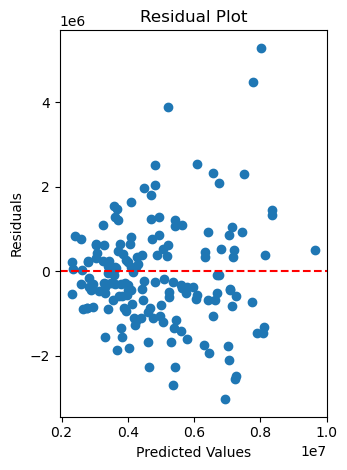

In [29]:
print (f"Mean Square Erroe : {mse}")
print(f"R2 Score : {r2}")

residuals = y_test - y_pre
plt.subplot(1, 2, 2)
plt.scatter(y_pre, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [16]:
model_2 = Ridge()
model_2.fit(X_train , y_train)
y_pred = model_2.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)

1537499523398.2153
0.6429726312097092


In [43]:
# Model Polynomial Linear Regression 
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X_train_scaled)
X_test_poly = pr.fit_transform(X_test_scaled)
lr = Ridge()
lr.fit(X_poly , y_train)

Ridge()

In [44]:

y_Pred = lr.predict(X_test_poly)

mse = mean_squared_error(y_test, y_Pred)
r2 = r2_score(y_test,y_Pred)

print(mse)
print(r2)

1473801472317.7217
0.6577641464123112
